# Introduction

This notebook is a simple demonstration of how you may be able to predict the phase of the gait cycle from the states from a simple linear regression.

**warning** This notebook doesn't seem to run with Pandas < 0.14.0. I get an error calling `results.rsquared`.

# Imports and Setup

In [1]:
import sys
sys.path.append('../src')

In [2]:
import matplotlib.pyplot as plt
from pandas import concat
import statsmodels.formula.api as smf
from gaitanalysis.gait import plot_gait_cycles

In [3]:
import utils
from gait_landmark_settings import settings

In [4]:
%matplotlib inline

In [5]:
from IPython.core.pylabtools import figsize
figsize(14, 10)

# Load First Data Set

Load the path to the directory with the experimental data.

In [6]:
trials_dir = utils.config_paths()['raw_data_dir']

This is the "training" data set. We simple collect all of the gait cycles from the perturbed portion of one trial from subject "A".

In [7]:
trial_number = '068'
trial = utils.Trial('068')
trial.prep_data('Longitudinal Perturbation')
gait_cycles = trial.gait_data_objs['Longitudinal Perturbation'].gait_cycles

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-longitudinal-perturbation.h5
_write_event_data_frame_to_disk took 0.04 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_write_inverse_dynamics_to_disk took 0.08 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_section_into_gait_cycles took 0.45 s to execute.


Now create a big data frame which has a column with the percent gait cycle `phi`. It also contains columns for all of the state values.

In [8]:
dfs = []
for i, df in gait_cycles.iteritems():
    dfs.append(df)
bigdf = concat(dfs)
bigdf['phi'] = bigdf.index.values

# Fit a model

Now specify a patsy formula for the module. We simply want to predict `phi` using all of the states as the multivariate linear regressors.

In [9]:
sensors, controls = utils.load_sensors_and_controls()
model = 'phi ~ Q("' + '") + Q("'.join(sensors) + '")' #+ ' + Q("FP1.ForY") + Q("FP2.ForY")'
model

'phi ~ Q("Right.Ankle.PlantarFlexion.Angle") + Q("Right.Ankle.PlantarFlexion.Rate") + Q("Right.Knee.Flexion.Angle") + Q("Right.Knee.Flexion.Rate") + Q("Right.Hip.Flexion.Angle") + Q("Right.Hip.Flexion.Rate") + Q("Left.Ankle.PlantarFlexion.Angle") + Q("Left.Ankle.PlantarFlexion.Rate") + Q("Left.Knee.Flexion.Angle") + Q("Left.Knee.Flexion.Rate") + Q("Left.Hip.Flexion.Angle") + Q("Left.Hip.Flexion.Rate")'

In [10]:
results = smf.ols(model, data=bigdf).fit()

The results show that we have a decent model with a high $R^2$ value.

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    phi   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     6753.
Date:                Fri, 24 Apr 2015   Prob (F-statistic):               0.00
Time:                        12:12:24   Log-Likelihood:                 8567.3
No. Observations:                8580   AIC:                        -1.711e+04
Df Residuals:                    8567   BIC:                        -1.702e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------

# Load validation data

Now we load in data from the same subject but at a different speed to test the model.

In [12]:
trial_number = '069'
trial = utils.Trial('068')
trial.prep_data('Longitudinal Perturbation')
gait_cycles = trial.gait_data_objs['Longitudinal Perturbation'].gait_cycles

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-longitudinal-perturbation.h5
_write_event_data_frame_to_disk took 0.06 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_write_inverse_dynamics_to_disk took 0.38 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_section_into_gait_cycles took 0.15 s to execute.


In [13]:
dfs = []
for i, df in gait_cycles.iteritems():
    dfs.append(df)
bigdf = concat(dfs)
bigdf['phi'] = bigdf.index.values

# Test the model

The following plot shows the actual percent gait cycle and that predicted by the linear model given the states from the new trial.

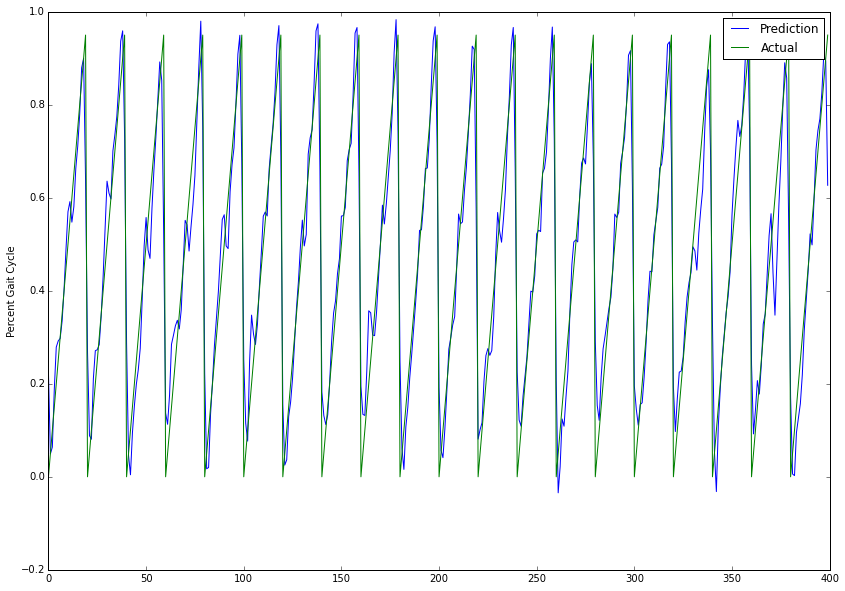

In [14]:
plt.plot(results.predict(bigdf)[:400])
plt.plot(bigdf['phi'].values[:400])
plt.legend(['Prediction', 'Actual'])
plt.ylabel('Percent Gait Cycle')

# Footer

In [15]:
!git rev-parse HEAD

6af0c229bb0a9edf78f8489d5f0efe02d5685a57


In [16]:
!git --git-dir=/home/moorepants/src/GaitAnalysisToolKit/.git --work-tree=/home/moorepants/src/GaitAnalysisToolKit rev-parse HEAD

9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c


In [17]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Installed version_information.py. To use it, type:
  %load_ext version_information


In [18]:
%load_ext version_information

In [19]:
%version_information gaitanalysis, dtk, numpy, scipy, pandas, matplotlib, tables, statsmodels, oct2py

Software,Version
Python,2.7.9 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython,3.0.0
OS,Linux 3.13.0 49 generic x86_64 with debian jessie sid
gaitanalysis,0.2.0dev
dtk,0.4.0
numpy,1.9.2
scipy,0.15.1
pandas,0.16.0
matplotlib,1.4.2
tables,3.1.1


In [20]:
!conda list

# packages in environment at /home/moorepants/anaconda/envs/gait-direct-id-paper:
#
backports.ssl-match-hostname 3.4.0.2                   <pip>
cairo                     1.12.18                       0  
dateutil                  2.4.1                    py27_0  
dynamicisttoolkit         0.4.0                    py27_0  
fastcache                 1.0.2                    py27_0  
fontconfig                2.11.1                        2  
freetype                  2.4.10                        0  
gaitanalysistoolkit (/home/moorepants/src/GaitAnalysisToolKit) 0.2.0.dev0                <pip>
hdf5                      1.8.14                        0  
ipython                   3.0.0                    py27_0  
ipython-notebook          3.0.0                    py27_1  
jinja2                    2.7.3                    py27_1  
jsonschema                2.4.0                    py27_0  
libpng                    1.5.13                        1  
libsodium                 0.4.5         

In [21]:
!pip freeze

backports.ssl-match-hostname==3.4.0.2
DynamicistToolKit==0.4.0
fastcache==1.0.2
-e git+git@github.com:csu-hmc/GaitAnalysisToolKit.git@9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c#egg=GaitAnalysisToolKit-origin_speedup-inverse-dynamics
ipython==3.0.0
Jinja2==2.7.3
jsonschema==2.4.0
MarkupSafe==0.23
matplotlib==1.4.2
mistune==0.5.1
nose==1.3.4
numexpr==2.3.1
numpy==1.9.2
oct2py==3.1.0
pandas==0.16.0
patsy==0.3.0
ptyprocess==0.4
Pygments==2.0.2
pyparsing==2.0.1
PySide==1.2.1
python-dateutil==2.4.2
pytz==2015.2
PyYAML==3.11
pyzmq==14.5.0
scipy==0.15.1
seaborn==0.5.1
six==1.9.0
snakeviz==0.3.1
statsmodels==0.6.1
sympy==0.7.6
tables==3.1.1
terminado==0.5
tornado==4.1
